# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

#### Решение:
Пусть на элементе $x_i$ мы получаем на нашем дереве ответ $\tilde{y_i}$, а настоящий ответ - это $y_i$. Тогда мы должны оценить следующую величину: $$E \big ( \frac{1}{N} \sum_i (\tilde{y_i} - y_i)^2 \big).$$ Распишем это выражение: $$E \big (\frac{1}{N} \sum_i (\tilde{y_i}^2 - 2 y_i \tilde{y_i} + y_i^2) \big) = \frac{1}{N} \sum_i E(\tilde{y_i}^2) + \frac{1}{N} \sum_i y_i E(\tilde{y_i}) + \frac{1}{N} \sum_i y_i^2.$$ Заметим, что для обоих случаев выбора ответа $\frac{1}{N}E(\tilde{y_i}) = \bar{y_i}.$ Значит, нам нужно только понять, в каком из двух случаев $\frac{1}{N} \sum_i E(\tilde{y_i}^2)$ будет меньше.
Для среднего значения: $E(\tilde{y_i}^2) = E\big(\big( \frac{1}{N} \sum_j w_j \big)^2\big) = \frac{1}{N} E w_j^2 + \frac{1}{N^2} \sum_{i \neq j} E(w_i w_j),$ где $w_i$ - значения в листе дерева.
Для случайного объекта из листа получаем следующее: $E(\tilde{y_i}^2) = E(w_j^2) = D(w_j) + E(w_j)^2.$ Мы считаем, что объекты тестовой выборки независимы и одинаково распределены. Тогда первое выражение можно преобразовать так: $\frac{1}{N} E w_j^2 + \frac{1}{N^2} \sum_{i \neq j} E(w_i w_j) = \frac{1}{N} E w_j^2 + \frac{N - 1}{N} E(w_j^2) = \frac{1}{N} D(w_j) + E(w_j^2).$ Мы видим, что в первом случае получилось меньшее матожидание ошибки, чем во втором. Значит, первая стратегия дает меньшее матожидание ошибки.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

#### Решение:
1) Заметим, что мы хотим найти оптимальное значение константы $c$, т.е. такое ее значение, при котором $H(R)$ будет тем меньше, чем меньше разброс выборки. Для этого посчитаем производную по $c$ и приравняем ее нулю. 
$$\bigg(\frac{1}{|R|} \sum_{(x_i, y_i)\in R} L(y_i, c)\bigg)' = \bigg(\frac{1}{|R|} \sum_{(x_i, y_i)\in R} (y-c)^2\bigg)' = \frac{2}{|R|} \sum_{(x_i, y_i)\in R} (y - c) = 0 \Rightarrow c = \frac{\sum_i y_i}{n},$$ где $n$ - количество $y$. Значит, при таком $c$ критерий информативности примет следующий вид: $$H(R) = \min_{c \in Y} \frac{1}{|R|}\sum_{(x_i, y_i) \in R} (y - \overline{y})^2 = D(y).$$ Видим, что мы получили дисперсию.

2) Для того, чтобы найти минимум критерия информативности найдем производные по всем $c_k$, приравняем их нулю, получим набор $c_k$, при которых достигается минимум критерия информативности. Преобразуем немного критерий информативности, чтобы его было удобнее диффенренцировать. $$H(R) = \min_{c \in Y} \frac{1}{|R|} \sum_{(x_i, y_i) \in R} \sum_{k = 1}^K (c_k - [y = k])^2 = \min_{c \in Y} \sum_{k = 1}^{K} \bigg( \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (c_k - [y = k])^2\bigg)$$. Теперь мы можем дифференцировать только внутреннюю сумму, потому что во внешней перебираем $c_k$. $$\bigg( \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (c_k - [y_i = k])^2 \bigg)' = \frac{2}{|R|}\sum_{(x_i, y_i) \in R} (c_k - [y_i = k]) = 0 \Rightarrow c_k = p(y_i = k).$$ При подстановке найденных $c_k$ в критерий информативности, получаем $$H(R) = \sum_{k = 1}^K \bigg( \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (p_k - [y_i = k])^2 \bigg ) = \sum_{k = 1}^K \bigg ( p_k^2 - \frac{1}{|R|} 2 p_k \sum_{(x_i, y_i) \in R} [y_i = k] + \frac{1}{|R|} \sum_{(x_i, y_i) \in R} [y_i = k]^2\bigg ) = \sum_{k = 1}^K (p_k - p_k^2) = \sum_{k = 1}^K p_k(1 - p_k).$$ Видим, что мы получили критерий Джини.

3) Аналогично предыдущему пункту преобразуем наш критерий информативности. $$ H(R) = \min_{c \in Y} \frac{1}{|R|} \sum_{(x_i, y_i) \in R} \bigg ( - \sum_{k = 1}^K [y = k] \log c_k \bigg) = \min_{c \in Y} \sum_{k = 1}^K \bigg ( - \frac{1}{|R|} \sum_{(x_i, y_i) \in R} [y_i = k] \log c_k \bigg ) = \min_{c \in Y} \sum_{k = 1}^K - p_k \log c_k.$$
Для нахождения минимума будем считать, что мы уже зафиксировали все $c_k$, кроме $c_1$ и $c_2$, причем $\sum_{k=1}^K c_k = 1$. Тогда нам остается только подобрать $c_1, c_2$ так, чтобы получить минимум нашей функции. Найдем минимум $-(p_1 \log c_1 + p_2 \log c_2)$. Так как все остальные $c_k$ фиксированыб сумма всех $c_k$ равна 1ю то и $c_1 + c_2 = t - const$. $$-(p_1 \log c_1 + p_2 \log c_2)' = -(\frac{p_1}{c_1} - \frac{p_2}{t - c_1}) = 0 \Rightarrow c_1 = \frac{p_1 t}{p_1 + p_2}, c_2 = \frac{p_2 t}{p_1 + p_2} \Rightarrow \frac{c_1}{c_2} = \frac{p_1}{p_2}.$$ Так как мы выбирали произвольные $c_1, c_2$, то аналогичное рассуждение будет верно для всех остальных $c_k$. Таким образом, $\frac{c_i}{c_j} = \frac{p_i}{p_j}$. Рассмотрим произвольное $i$ просуммируем все такие дроби для данного $i$. $$\frac{\sum_j c_j}{c_i} = \frac{\sum_j p_j}{p_i} = \frac{1}{p_i} = \frac{1}{c_i} \Rightarrow c_i = p_i.$$. Значит, наш критерий информативности примет вид $$H(R) = \sum_{k = 1}^K -p_k \log p_k.$$ Это и есть энтропийный критерий.

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значению этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

#### Ответ:
Рассмотрим произвольную вершину, в которой нам надо выбрать пороговую функцию. Мы перебираем все признаки в нашей подвыборке, а для каждого признака перебираем все его значения в данной подвыборке. Допустим, мы выбрали пороговую функцию для данной вершины. Тогда в левого сына пойдет подвыборка, в которой для выбранного признака его значения будут меньше порога, а в правого сына - значения больше порога. Тогда в каждом из сыновей мы снова будем перебирать все признаки, кроме нашего; для них будут те же наборы параметров, которые мы перебирали и в отце. А для признака, по которому мы разделили выборку в каждом сыне мы переберем только часть значений параметров, ведь мы разделили выборку именно таким образом. Но если посмотреть на общее количество операций, затраченных на левого и правого сына, то за скобку вынесутся все признаки, кроме нашего, а в сумме по двум сыновьям наш признак даст столько же операций, сколько было в отце. Значит, на каждом уровне нашего дерева будет одинаковое количество операций. Таким образом мы получаем, что общее количество операций - это $O(D * l * d)$, потому что всего уровней $D$, а на каждомы уровне мы для каждого признака перебираем всю выборку, чтобы разделить ее на левого и правого сына.
#### Итого: $O(D * l * d)$

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [2]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None)
columns = ('buying maint doors persons lug_boot safety class')
df.columns = columns.split()

In [65]:
data = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
target = df['class']

In [88]:
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

df, encoders = number_encode_features(df)
data = df.iloc[:, 0:-1]
target = df.iloc[:, -1]
print(df.iloc[5])

buying      3
maint       3
doors       0
persons     0
lug_boot    1
safety      0
class       2
Name: 5, dtype: int64


In [74]:
tree_clf = DecisionTreeClassifier(max_depth=20)
tree_clf.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [75]:
import IPython.display #needed to render in notebook
from io import StringIO
import pydot  #needed to convert dot format to png

from sklearn import tree

def draw_decision_tree(clf, column_names):
    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    a = IPython.display.Image(graph[0].create_png())#, width=2000, height=250000)
    IPython.display.display(a)

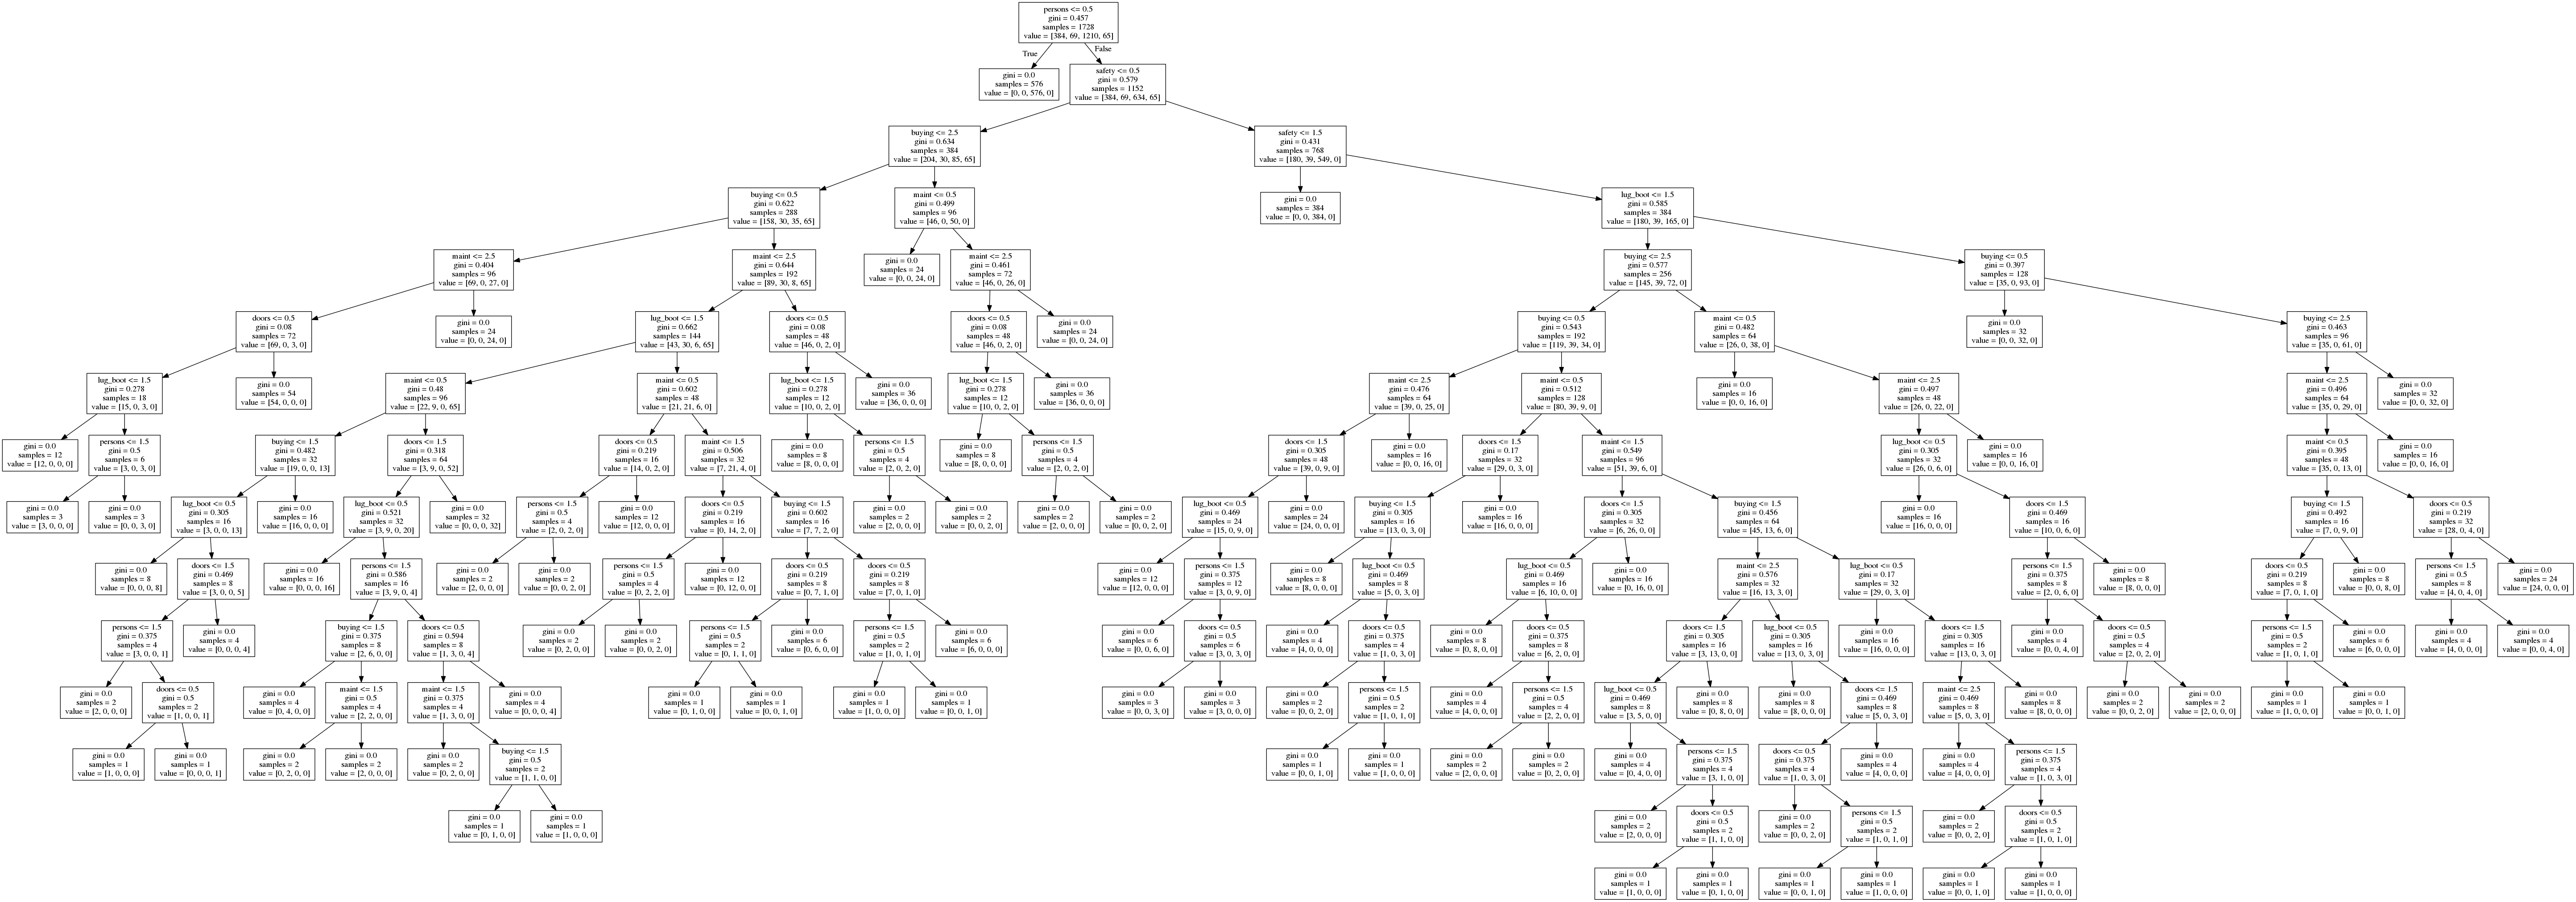

In [76]:
draw_decision_tree(tree_clf, columns.split()[:-1])

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

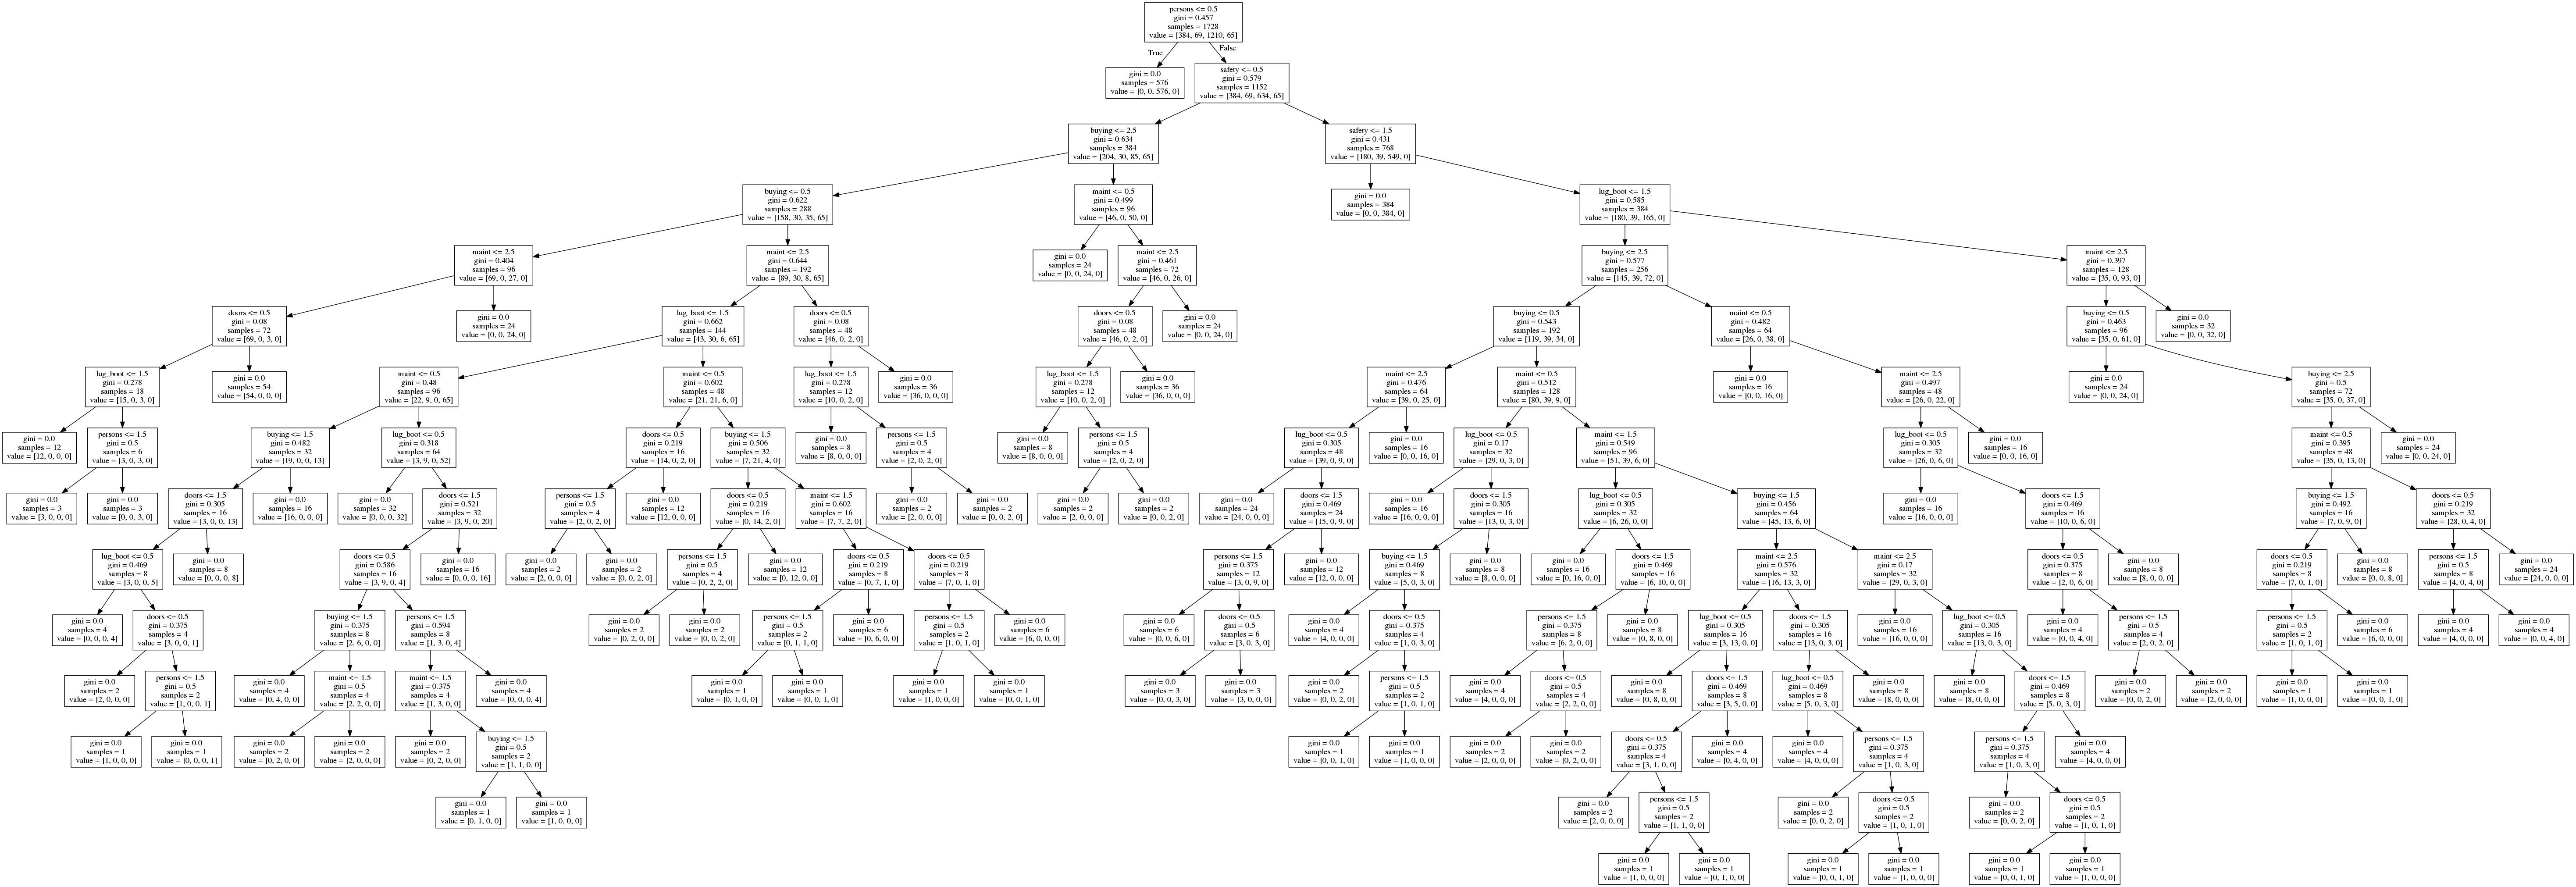

In [77]:
tree_clf_max_depth = DecisionTreeClassifier(max_depth=50)
tree_clf_max_depth.fit(data, target)
draw_decision_tree(tree_clf_max_depth, columns.split()[:-1])

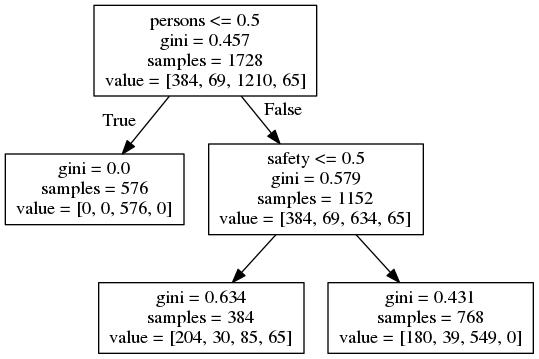

In [78]:
tree_clf_min_depth = DecisionTreeClassifier(max_depth=2)
tree_clf_min_depth.fit(data, target)
draw_decision_tree(tree_clf_min_depth, columns.split()[:-1])

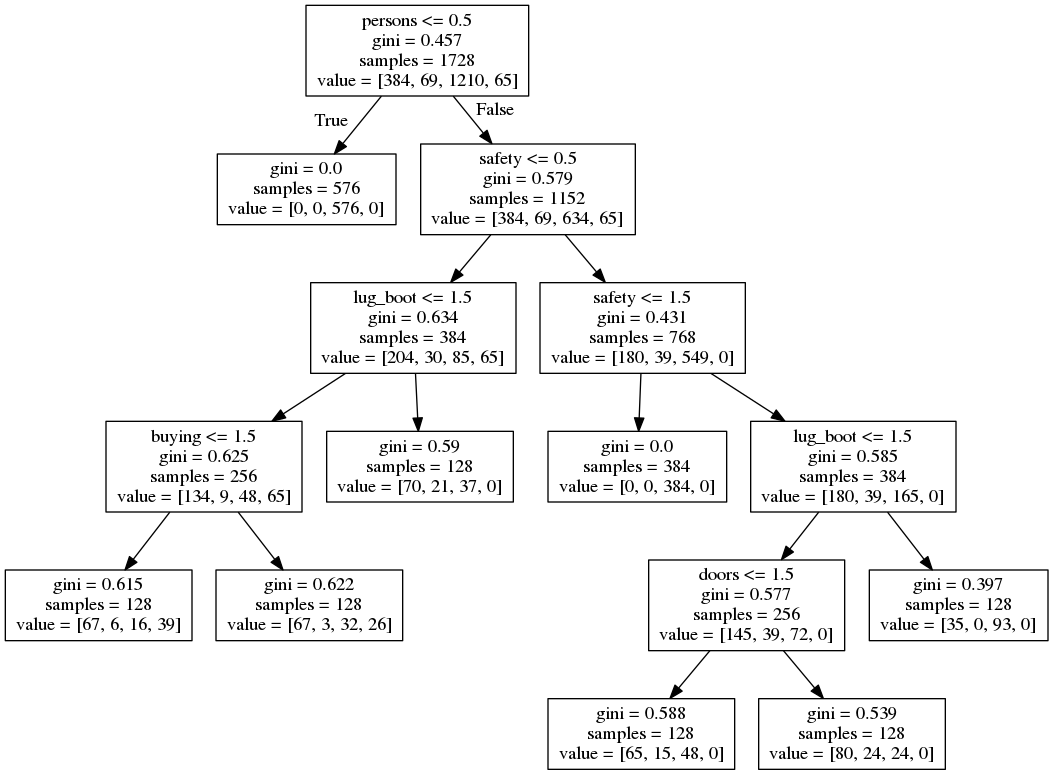

In [79]:
tree_clf_max_leaves = DecisionTreeClassifier(min_samples_leaf=100)
tree_clf_max_leaves.fit(data, target)
draw_decision_tree(tree_clf_max_leaves, columns.split()[:-1])

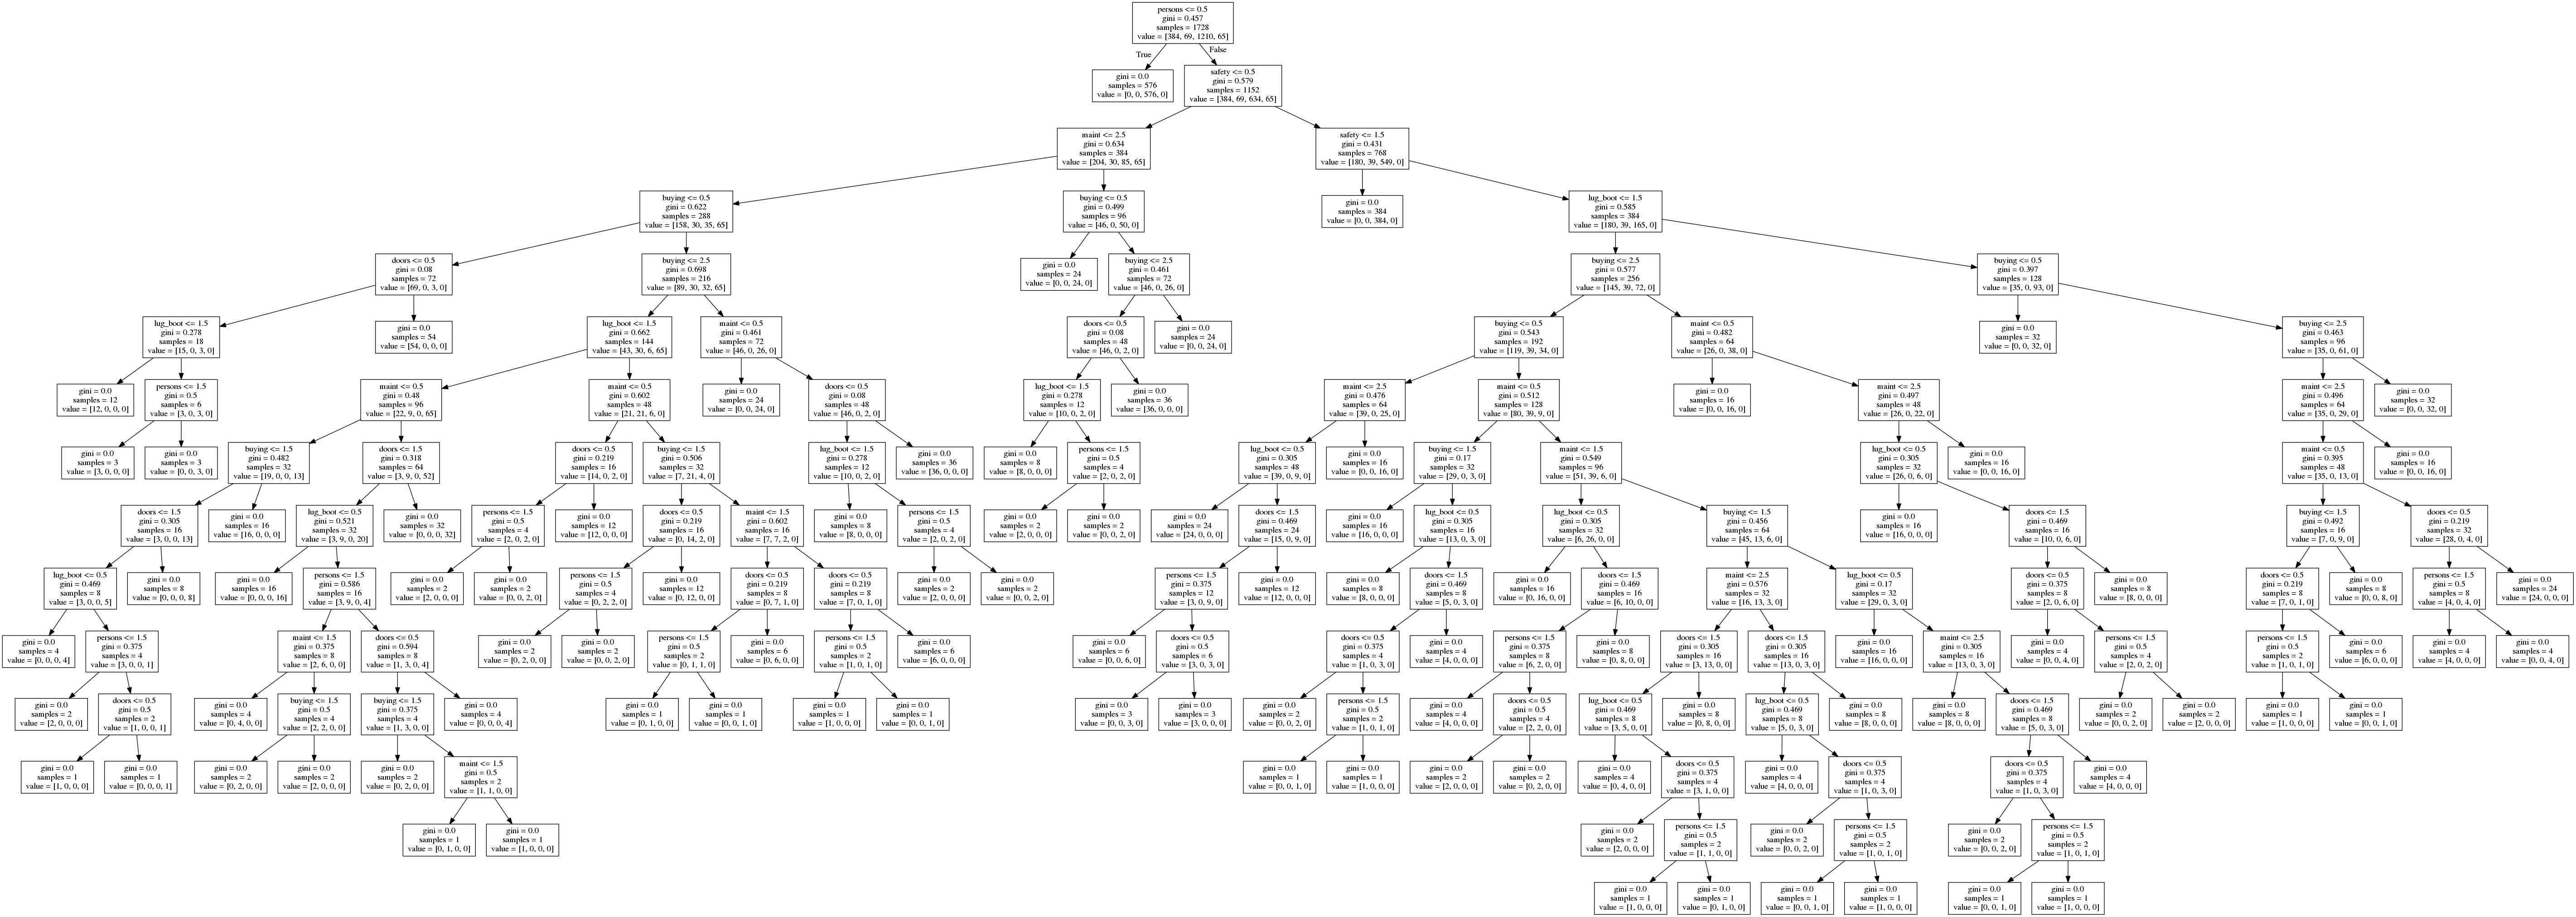

In [80]:
tree_clf_min_leaves = DecisionTreeClassifier(min_samples_leaf=1)
tree_clf_min_leaves.fit(data, target)
draw_decision_tree(tree_clf_min_leaves, columns.split()[:-1])

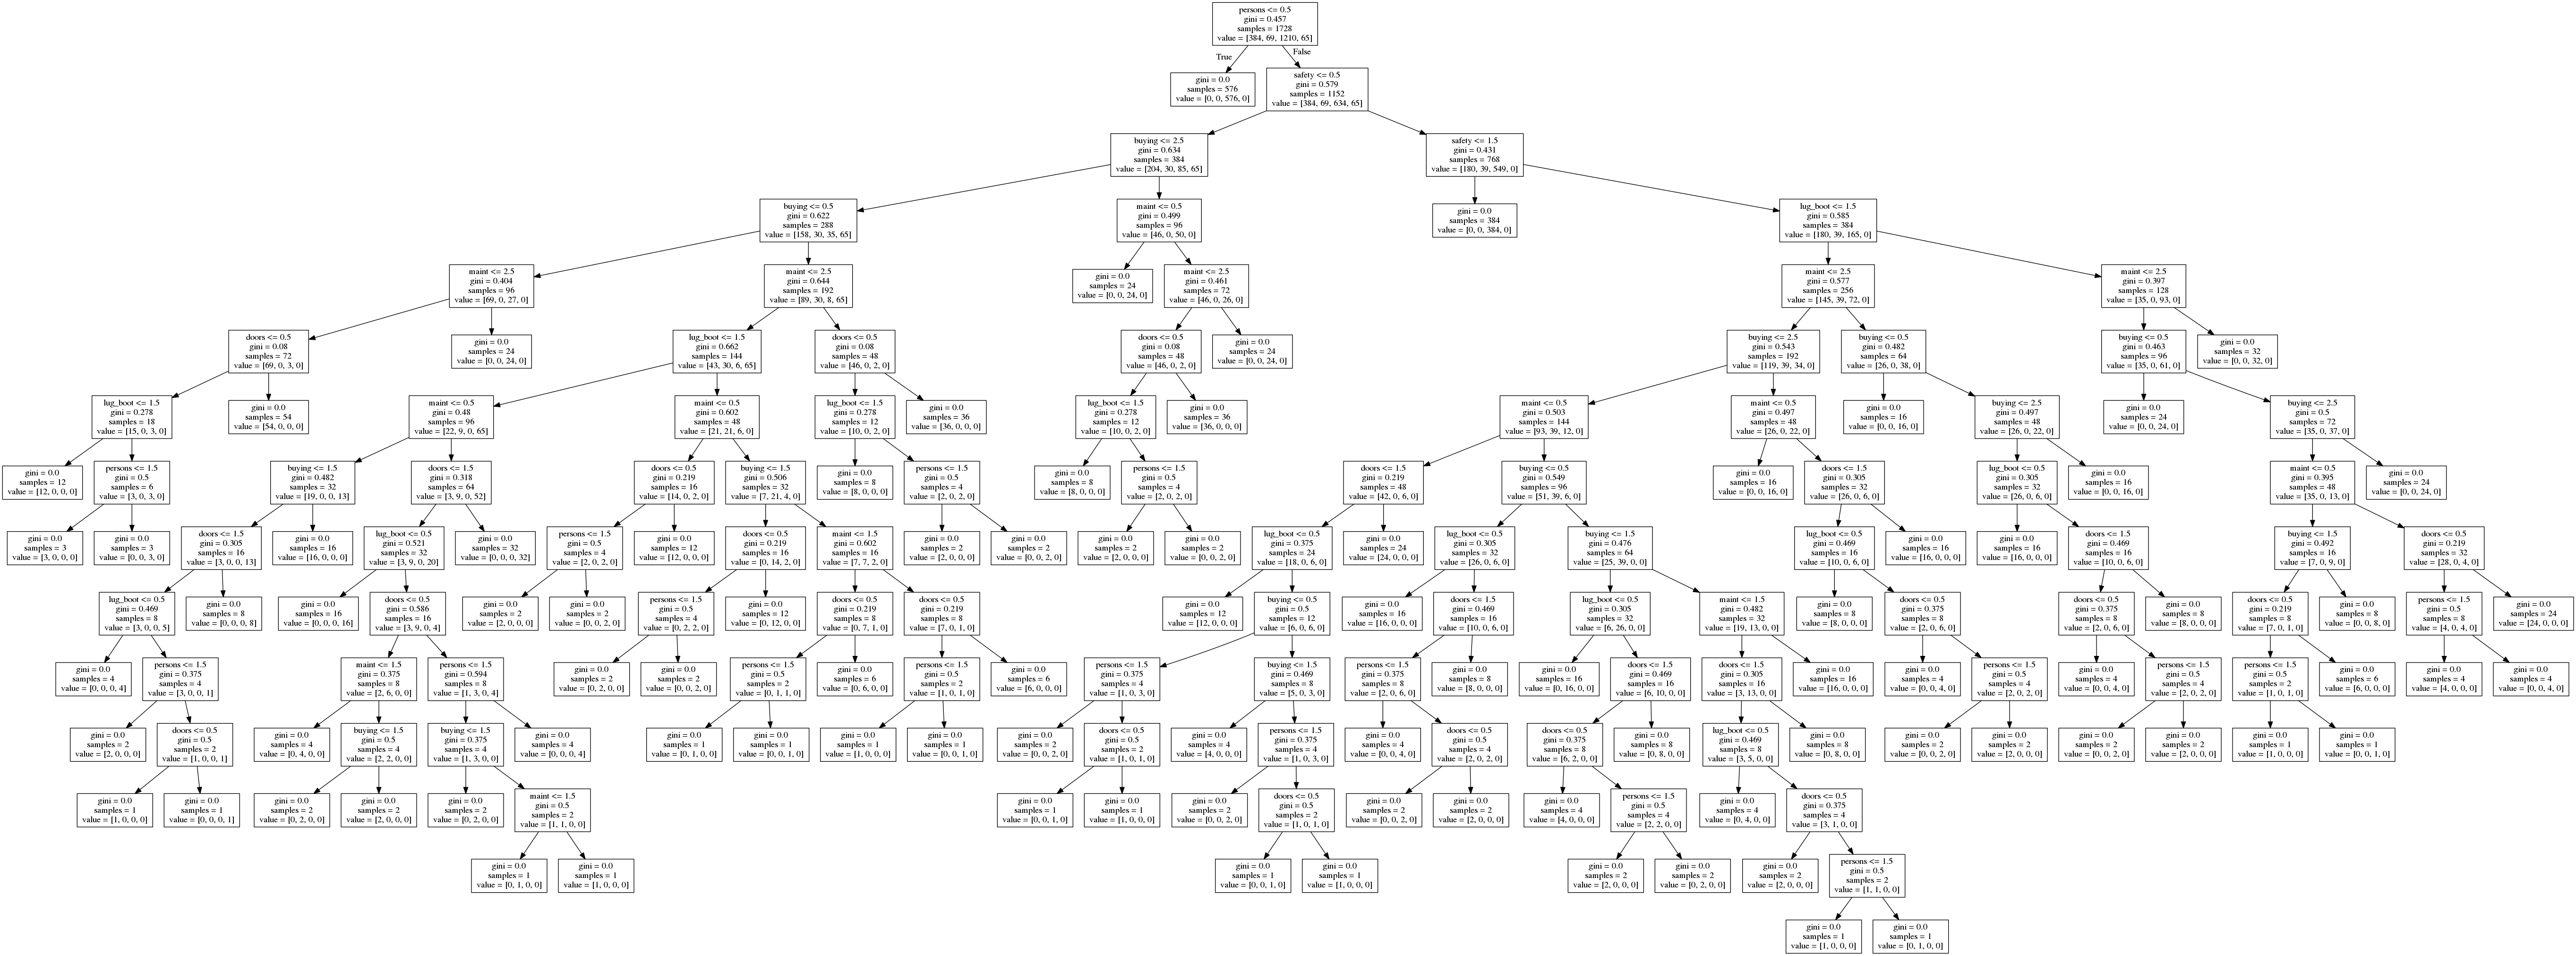

In [81]:
tree_clf_feat_gini = DecisionTreeClassifier(criterion='gini')
tree_clf_feat_gini.fit(data, target)
draw_decision_tree(tree_clf_feat_gini, columns.split()[:-1])

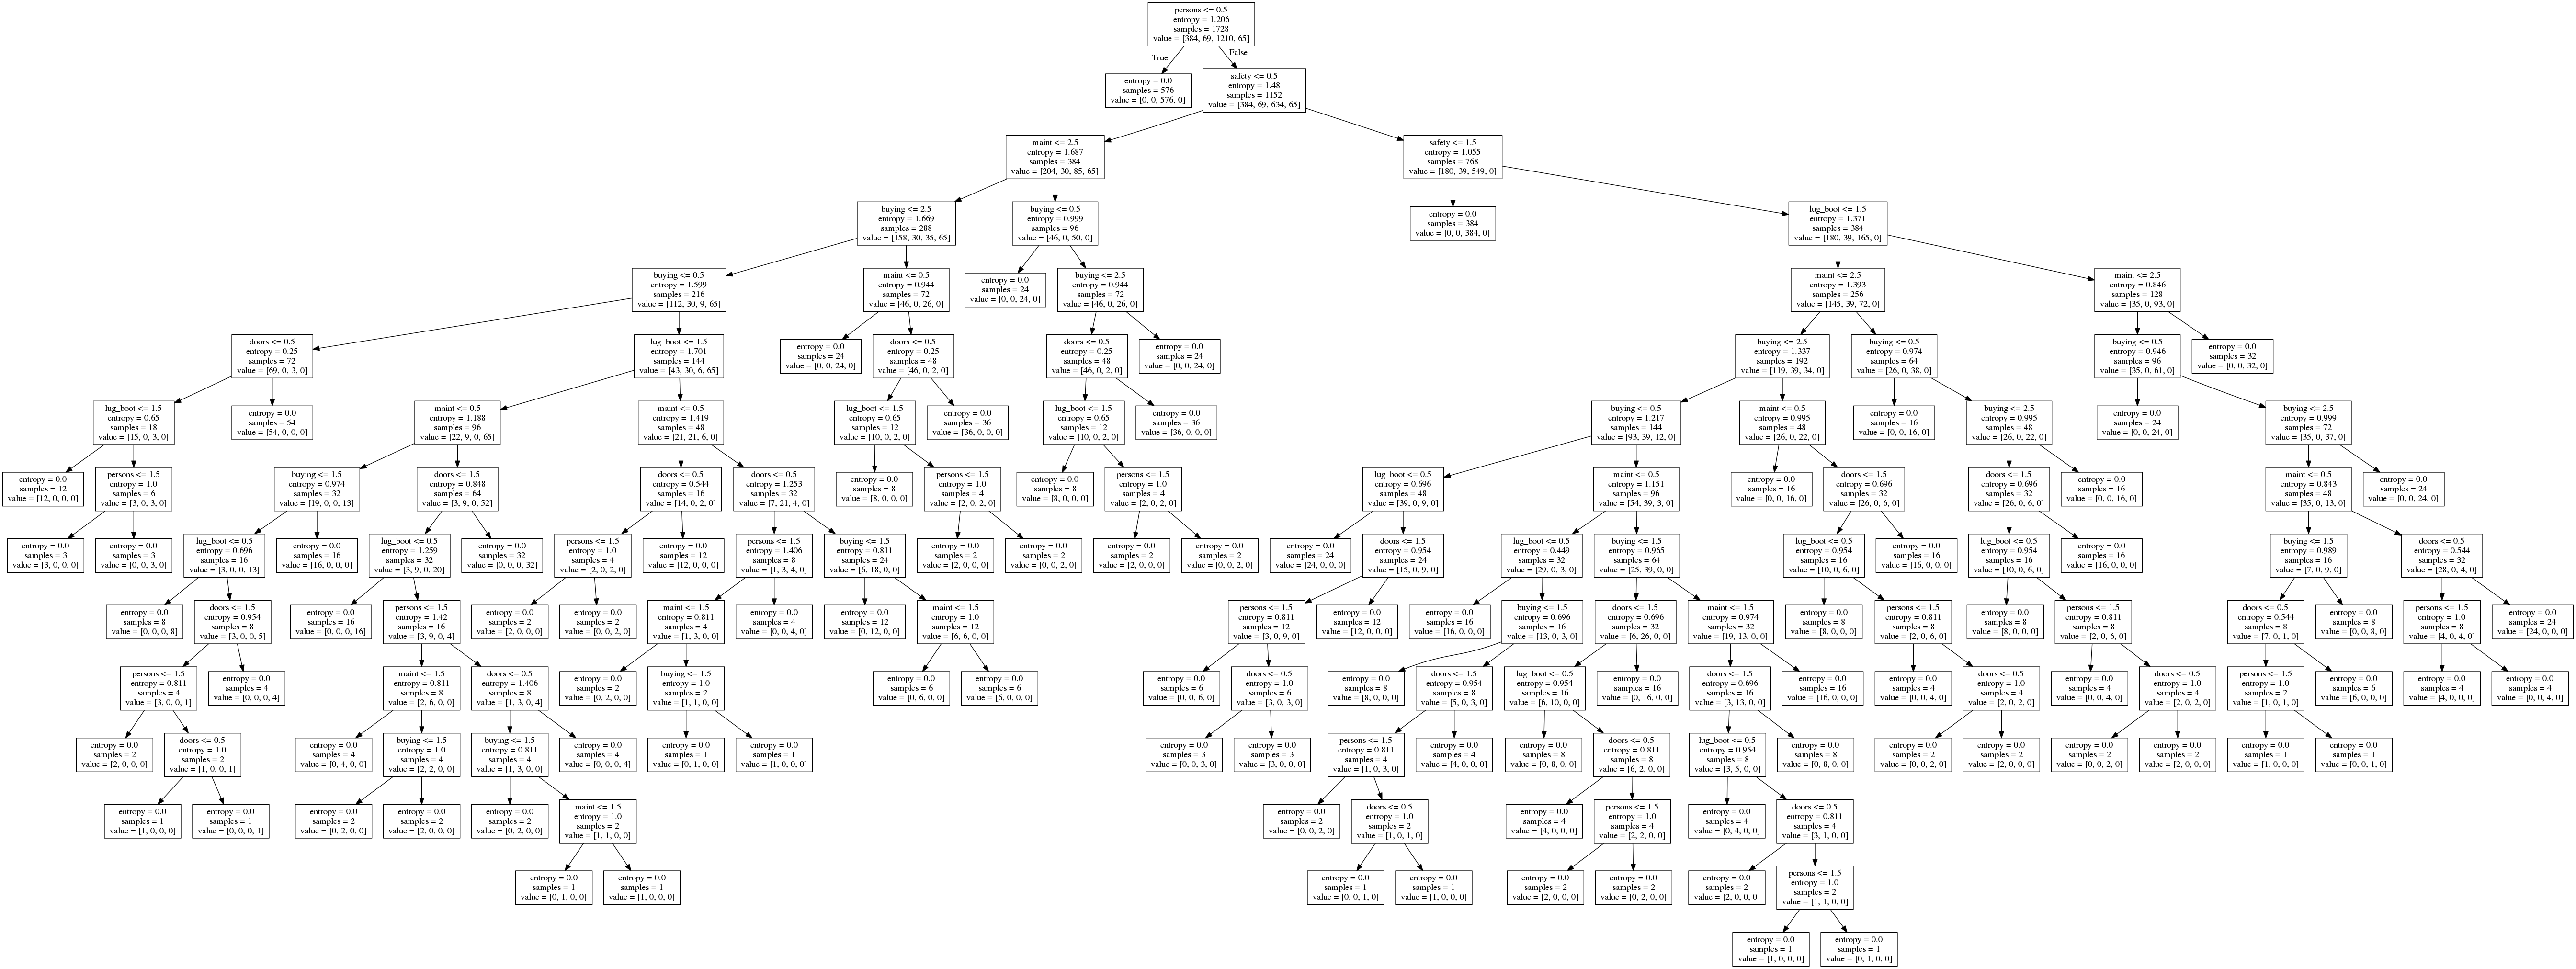

In [82]:
tree_clf_feat_entropy = DecisionTreeClassifier(criterion='entropy')
tree_clf_feat_entropy.fit(data, target)
draw_decision_tree(tree_clf_feat_entropy, columns.split()[:-1])

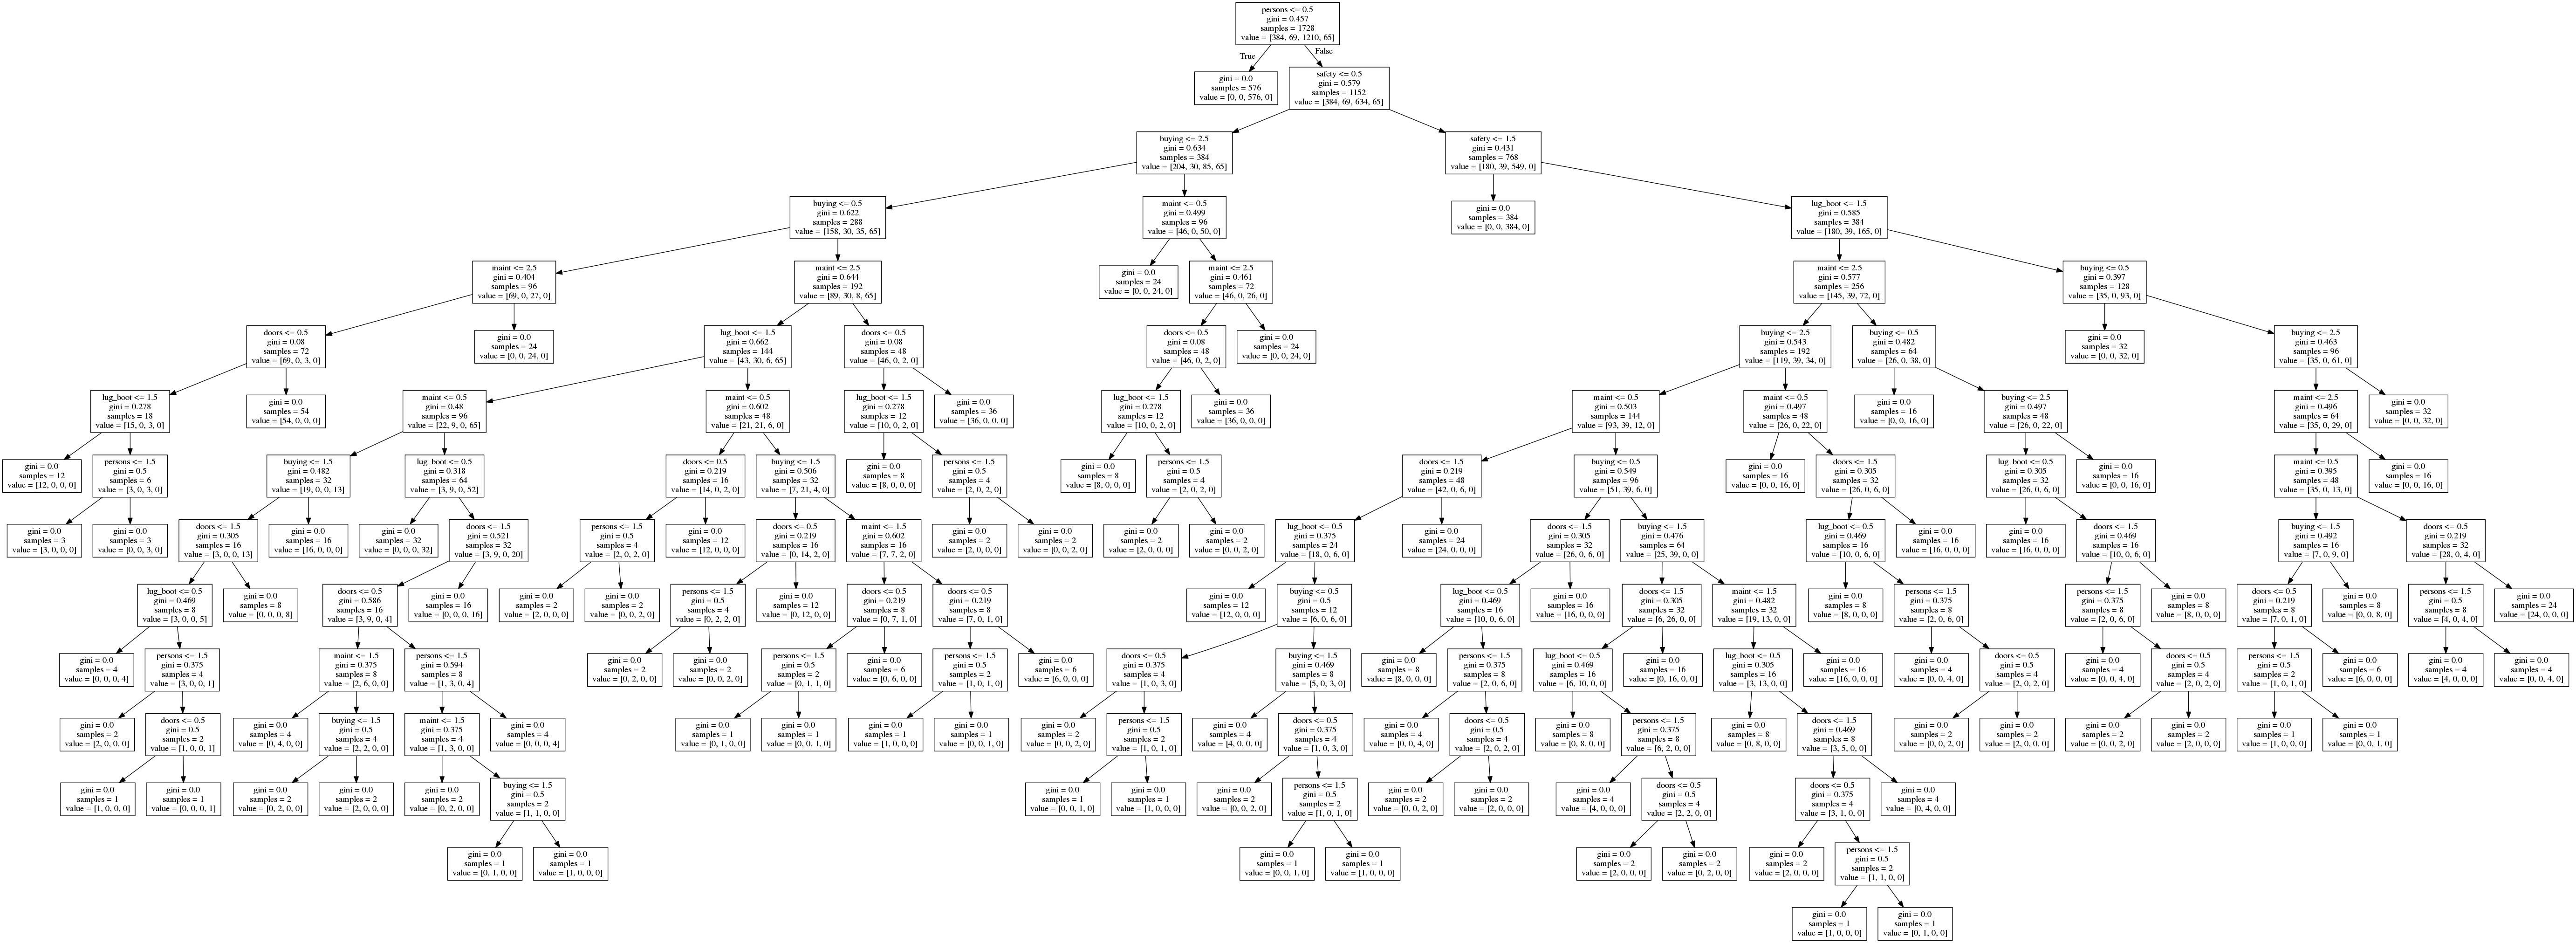

In [83]:
tree_clf_max_feat = DecisionTreeClassifier(max_features=4, max_depth=7)
tree_clf_big_max_depth.fit(data, target)
draw_decision_tree(tree_clf_big_max_depth, columns.split()[:-1])

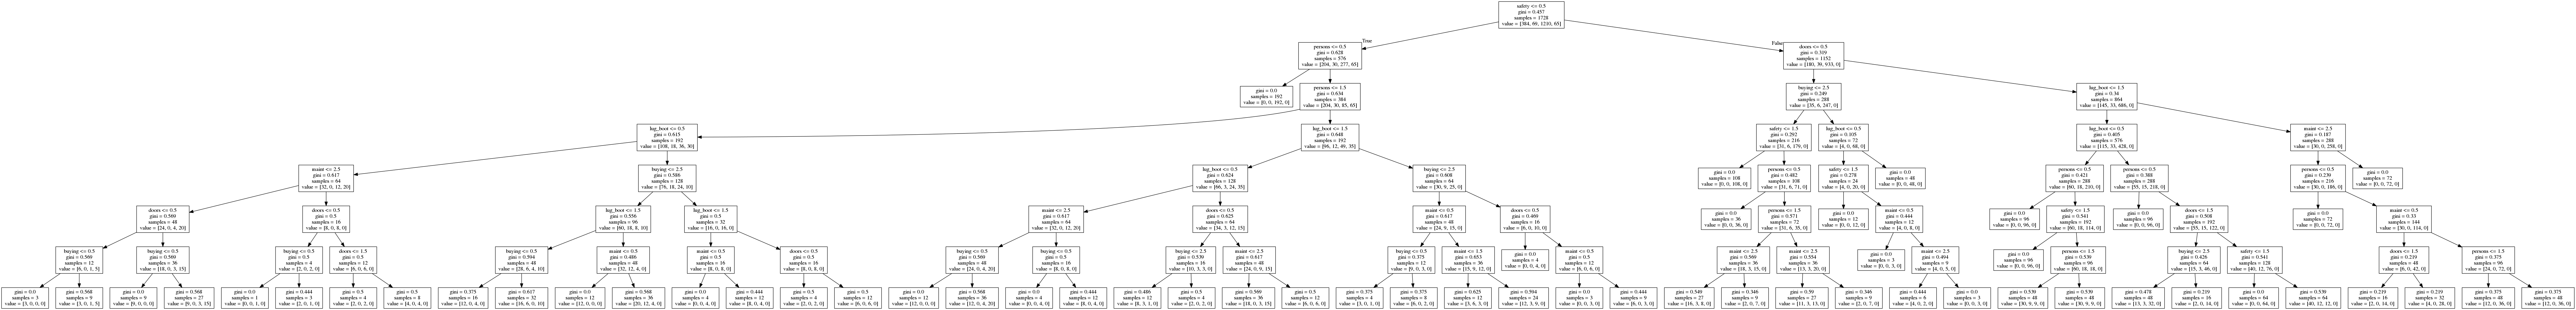

In [84]:
tree_clf_min_feat = DecisionTreeClassifier(max_features=1, max_depth=7)
tree_clf_min_feat.fit(data, target)
draw_decision_tree(tree_clf_min_feat, columns.split()[:-1])

#### Вывод:
Мы видим, что при большой глубине и маленьком количестве объектов в листьях наше дерево переобучается, что соответствует теории.

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [8]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [15]:
def count_probs(y):
    classes, counts = np.unique(np.array(y), return_counts=True)
    counts = counts / len(y)
    return counts

def entropy(y):  
    probs = count_probs(y)
    log_probs = np.log2(probs)
    return -1 * np.sum(probs * log_probs)


def gini(y):
    probs = count_probs(y)
    return 1 - np.sum(np.array(probs) ** 2)

def variance(y):
    exp_val = np.sum(y) / len(y)
    return np.sum((y - np.ones(len(y)) * exp_val) ** 2) / len(y)

def mad_median(y):
    median = np.median(y)
    return np.sum(np.absolute(y - np.ones(len(y)) * median)) / len(y)

def error_with_func(y_left, y_right, l_X, fun):
    err = fun(np.concatenate((y_left, y_right))) - fun(y_left) * (len(y_left) / l_X)
    err -= fun(y_right) * (len(y_right) / l_X)
    return err

def count_error(tree, y_left, y_right):
    l_X = (len(y_left) + len(y_right))
    if tree.criterion == 'gini':
        return error_with_func(y_left, y_right, l_X, gini)
    elif tree.criterion == 'entropy':
        return error_with_func(y_left, y_right, l_X, entropy)
    elif tree.criterion == 'variance':
        return error_with_func(y_left, y_right, l_X, variance)
    else:
        return error_with_func(y_left, y_right, l_X, mad_median)
    
def answer_in_leaf(tree, curr_ind, curr_y):
    # Here we count the list of probabilities for current leaf
    for i in range(4):
        tree.tree[curr_ind].append(-1)
    
    classes, counts = np.unique(curr_y, return_counts=True)
    proba_in_leaf = []
    for i in range(len(tree.diff_y)):
        if tree.diff_y[i] in classes:
            proba_in_leaf.append(counts[list(classes).index(tree.diff_y[i])] / np.sum(counts))
        else:
            proba_in_leaf.append(0)
   
    # Here we count the answer for this leaf
    
    if tree.criterion == 'gini' or tree.criterion == 'entropy':
        ans = classes[list(counts).index(np.max(counts))]
        tree.tree[curr_ind].append(ans)
    else:
        ans = np.sum(classes * counts) / np.sum(counts)
        tree.tree[curr_ind].append(ans)
    tree.tree[curr_ind].append(proba_in_leaf)
    return
    
def fit_recursion(tree, curr_ind, curr_X, curr_y, depth):
    if depth == tree.max_depth:
        answer_in_leaf(tree, curr_ind, curr_y)
        return
    if len(curr_X.values) < tree.min_samples_split:
        answer_in_leaf(tree, curr_ind, curr_y)
        return
    
    opt_column = ''
    opt_num = 0
    min_error = - np.inf
    opt_left = []
    opt_right = []
    x_left = []
    x_right = []
    for column in curr_X.columns.values:
        diff_num = np.unique(curr_X.iloc[:, column].values)
        for number in diff_num:
            t_f_mass = np.less(curr_X.iloc[:, column].values, np.ones(len(curr_X.iloc[:, column].values), dtype=float) * number)
            x_right, x_left = [], []
            for i in range(len(t_f_mass)):
                if t_f_mass[i] == True:
                    x_left.append(i)
                else:
                    x_right.append(i)
            curr_error = count_error(tree, np.array(curr_y)[x_left], np.array(curr_y)[x_right])
            if curr_error > min_error and x_left != [] and x_right != []:
                min_error = curr_error
                opt_column = column
                opt_num = number
                opt_left = x_left
                opt_right = x_right
    
    #print(opt_column)
    left_ind = tree.max_ind
    right_ind = tree.max_ind + 1
    tree.tree[curr_ind].append(left_ind)
    tree.tree[curr_ind].append(right_ind)
    tree.tree[curr_ind].append(opt_column)
    tree.tree[curr_ind].append(opt_num)
    tree.max_ind += 2
    tree.tree.append([])
    tree.tree.append([])
    fit_recursion(tree, left_ind, curr_X.iloc[opt_left], np.array(curr_y)[opt_left], depth + 1)
    fit_recursion(tree, right_ind, curr_X.iloc[opt_right], np.array(curr_y)[opt_right], depth + 1)
    return

def predict_one_obj(tree, curr_ind, obj):
    if tree.tree[curr_ind][0] == -1:
        return tree.tree[curr_ind][4]
    if obj[tree.tree[curr_ind][2]] < tree.tree[curr_ind][3]:
        return predict_one_obj(tree, tree.tree[curr_ind][0], obj)
    else:
        return predict_one_obj(tree, tree.tree[curr_ind][1], obj)
        
def predict_proba_obj(tree, curr_ind, obj):
    if tree.tree[curr_ind][0] == -1:
        return tree.tree[curr_ind][5]
    if obj[tree.tree[curr_ind][2]] < tree.tree[curr_ind][3]:
        return predict_proba_obj(tree, tree.tree[curr_ind][0], obj)
    else:
        return predict_proba_obj(tree, tree.tree[curr_ind][1], obj)

In [16]:
class DecisionTree(BaseEstimator):
    
    def __init__(self, max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.tree = [[]]    # 0th elem - pointer to left son, 1th - pointer to the right son, 2th - delimeter, 3th - threshold, 4th - ans, 5th - probab ans
        self.diff_y = []
        self.max_ind = 1
    
    def fit(self, X, y):
        self.diff_y = np.unique(y)
        fit_recursion(self, 0, X, y, 0)
        return self
        
    def predict(self, X):
        answer_y = []
        for i in range(len(X)):
            curr_x = X.iloc[i].values
            answer_y.append(predict_one_obj(self, 0, curr_x))
        return answer_y
        
    def predict_proba(self, X):
        answer_y = []
        for i in range(len(X)):
            curr_x = X.iloc[i].values
            answer_y.append(predict_proba_obj(self, 0, curr_x))
        return answer_y

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [7]:
digits = load_digits()
digits_data = pd.DataFrame(digits.data)
digits_data['target'] = digits.target
train_data, test_data, train_target, test_target = train_test_split(digits_data.iloc[:, :-1], 
                                                                    digits_data['target'],
                                                                   test_size=0.2, random_state=RANDOM_STATE)



In [8]:
tree_gini = DecisionTree(max_depth=5, criterion='gini')
tree_entr = DecisionTree(max_depth=5, criterion='entropy')
tree_gini = tree_gini.fit(train_data, list(train_target.values))
tree_gini = tree_entr.fit(train_data, list(train_target.values))

In [9]:
ans_gini = tree_gini.predict(test_data)
ans_entr = tree_entr.predict(test_data)

print(accuracy_score(ans_gini, test_target))
print(accuracy_score(ans_entr, test_target))

0.672222222222
0.808333333333


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [22]:
parameters = {'max_depth':range(3, 11), 'criterion':['gini', 'entropy']}
grid_clf_gini_entr = GridSearchCV(DecisionTree(), parameters, scoring='accuracy', n_jobs=-2, cv=5)

In [23]:
grid_clf_gini_entr.fit(digits_data.iloc[:, :-1], digits_data.iloc[:, -1])

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTree(criterion='gini', debug=None, max_depth=inf, min_samples_split=2),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'max_depth': range(3, 11), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
grid_clf_gini_entr.best_params_

{'criterion': 'entropy', 'max_depth': 9}

Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

In [94]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

%matplotlib inline

gini_ans = []
entr_ans = []
for i in range(10):
    gini_ans.append(np.sum(cross_val_score(DecisionTree(max_depth=i+1, criterion='gini'), digits_data.iloc[:, :-1], 
                                           digits_data.iloc[:, -1], cv=5, scoring='accuracy')) / 5)
    entr_ans.append(np.sum(cross_val_score(DecisionTree(max_depth=i+1, criterion='entropy'), digits_data.iloc[:, :-1], 
                                           digits_data.iloc[:, -1], cv=5, scoring='accuracy')) / 5)

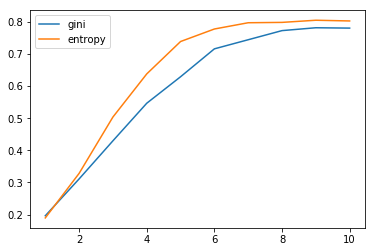

In [95]:
plt.plot(range(1, 11), gini_ans, label='gini')
plt.plot(range(1, 11), entr_ans, label='entropy')
plt.legend()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

#### Ответ:
Мы видим, что при max_depth >= 5 score не увеличивается, и остается постоянным. При этом entropy идет выше gini, что говорит о том, что entropy на данном датасете работает лучше.

Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [74]:
tree_clf = DecisionTree(max_depth=8, criterion='gini')
tree_clf.fit(train_data, train_target)

In [75]:
predicted_mass = tree_clf.predict_proba(test_data)
print(predicted_mass)

[[0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0], [0, 0.0625, 0.0089285714285714281, 0.13392857142857142, 0.017857142857142856, 0.053571428571428568, 0, 0.035714285714285712, 0.017857142857142856, 0.6696428571428571], [0, 0, 0, 0.99029126213592233, 0, 0, 0, 0, 0, 0.0097087378640776691], [0, 0, 0, 0.03125, 0.03125, 0, 0, 0.9375, 0, 0], [0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0], [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0], [0, 0, 0, 0.99029126213592233, 0, 0, 0, 0, 0, 0.0097087378640776691], [0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0], [0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.97647058823529409, 0.011764705882352941, 0, 0, 0, 0.011764705882352941, 0, 0], [0, 0, 0, 0.33333333333333331, 0, 0.33333333333333331, 0.33333333333333331, 0, 0, 0], [0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0], [0, 0, 0.97647058823529409, 0.011764705882352941, 0, 0, 0, 0.011764705882352941, 0, 0], [0, 0, 0, 0.99029126213592233, 0, 0, 0, 0, 0, 0.0097087378640776691], [0, 

Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

In [76]:
print(np.mean(predicted_mass, axis=0))

[ 0.08271605  0.07822085  0.08184639  0.10271247  0.12768036  0.13960354
  0.1091358   0.10021442  0.08165908  0.09621103]


Чему примерно равна максимальная вероятность в полученном векторе?

#### Ответ:
Мы видим, что максимальная вероятность у 5. Это значит, что она вероятнее всего будет выдана нам в качестве ответа. 

### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [9]:
boston = load_boston()
boston_data = pd.DataFrame(boston.data)
boston_data['target'] = boston.target
train_data, test_data, train_target, test_target = train_test_split(boston_data.iloc[:, :-1], boston_data.iloc[:, -1],
                                                                    test_size=0.2, random_state=RANDOM_STATE)

In [10]:
tree_var = DecisionTree(max_depth=5, criterion='variance')
tree_mad = DecisionTree(max_depth=5, criterion='mad_median')
tree_var = tree_var.fit(train_data, list(train_target.values))
tree_mad = tree_mad.fit(train_data, list(train_target.values))
predict_var = tree_var.predict(test_data)
predict_mad = tree_mad.predict(test_data)
print(mean_squared_error(predict_var, test_target))
print(mean_squared_error(predict_mad, list(test_target.values)))

/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


8.45146924654
16.0973140255


С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

In [25]:
parameters = {'max_depth':range(2, 9), 'criterion':['variance', 'mad_median']}
grid_clf_var_mad = GridSearchCV(DecisionTree(), param_grid=parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-2)
grid_clf_var_mad.fit(boston_data.iloc[:, :-1], boston_data.iloc[:, -1])

/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_laun

/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_laun

/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: M

/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTree(criterion='gini', debug=None, max_depth=inf, min_samples_split=2),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'max_depth': range(2, 9), 'criterion': ['variance', 'mad_median']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [26]:
grid_clf_var_mad.best_params_

{'criterion': 'variance', 'max_depth': 5}

Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

In [12]:
# from sklearn.model_selection import cross_val_score

var_ans = []
mad_ans = []
for i in range(10):
    var_ans.append(np.sum(cross_val_score(DecisionTree(max_depth=i+1, criterion='variance'), 
                                          boston_data.iloc[:, :-1], 
                                          boston_data.iloc[:, -1], cv=5, scoring='neg_mean_squared_error')) / 5)
    mad_ans.append(np.sum(cross_val_score(DecisionTree(max_depth=i+1, criterion='mad_median'), 
                                          boston_data.iloc[:, :-1], 
                                          boston_data.iloc[:, -1], cv=5, scoring='neg_mean_squared_error')) / 5)

/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_laun

/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  r

/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: M

/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_laun

/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/daniil/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  r

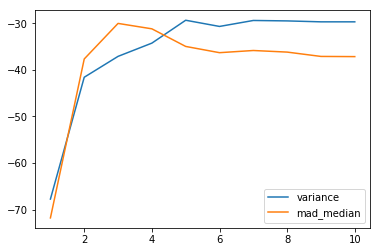

In [14]:
plt.plot(range(1, 11), var_ans, label='variance')
plt.plot(range(1, 11), mad_ans, label='mad_median')
plt.legend()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

#### Ответ:
Мы видим, что оптимальные значения параметров - это variance и max_depth=5, что подтверждает ответ, 
полученный с помощью GridSearchCV.